In [1]:
## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## load Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [5]:
fraud = pd.read_csv('Fraud_check.csv')

In [6]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [10]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [12]:
## EDA

In [13]:
# Data Visualization

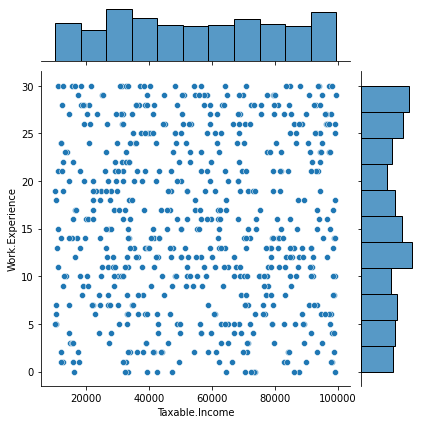

In [18]:
sns.jointplot(x = 'Taxable.Income', y = 'Work.Experience', data = fraud)

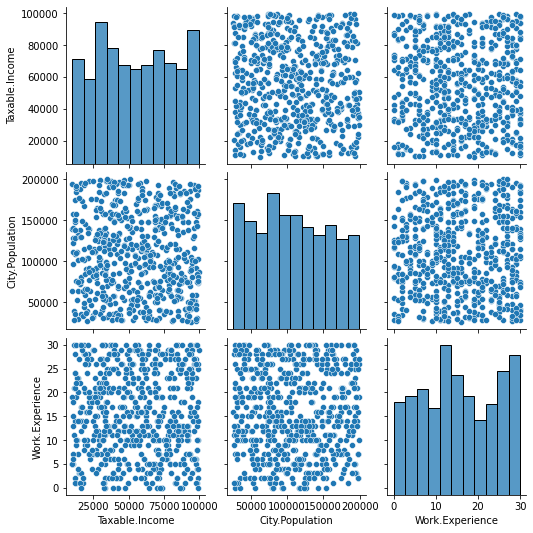

In [19]:
sns.pairplot(fraud)

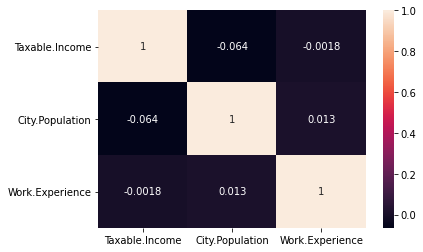

In [20]:
sns.heatmap(fraud.corr(), annot = True)

In [21]:
# Preprocessing

In [22]:
fraud.loc[fraud['Taxable.Income'] <= 30000, 'Taxable.Income1'] = 'Good'
fraud.loc[fraud['Taxable.Income'] >  30000, 'Taxable.Income1'] = 'Risky'

In [24]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


In [25]:
## Decision Tree

In [27]:
# Decision Tree Classifier

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import datasets

In [30]:
# Label Encoder

In [31]:
a=preprocessing.LabelEncoder()
fraud["Undergrad"]=a.fit_transform(fraud["Undergrad"])
fraud["Marital.Status"]=a.fit_transform(fraud["Marital.Status"])
fraud["Urban"]=a.fit_transform(fraud["Urban"])
fraud["Taxable.Income1"]=a.fit_transform(fraud["Taxable.Income1"])

In [32]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [33]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)

In [34]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [35]:
# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x = fraud.iloc[:,0:5]
y = fraud['Taxable.Income1']

In [38]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [39]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income1, Length: 600, dtype: int64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
## Model Building

In [43]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
# Tree

[Text(193.55625, 195.696, 'X[3] <= 24.5\nentropy = 0.734\nsamples = 480\nvalue = [99, 381]'),
 Text(136.01250000000002, 152.208, 'X[2] <= 197770.0\nentropy = 0.77\nsamples = 373\nvalue = [84, 289]'),
 Text(83.7, 108.72, 'X[3] <= 14.5\nentropy = 0.759\nsamples = 369\nvalue = [81, 288]'),
 Text(41.85, 65.232, 'X[3] <= 11.5\nentropy = 0.689\nsamples = 239\nvalue = [44, 195]'),
 Text(20.925, 21.744, 'entropy = 0.75\nsamples = 182\nvalue = [39, 143]'),
 Text(62.775000000000006, 21.744, 'entropy = 0.429\nsamples = 57\nvalue = [5, 52]'),
 Text(125.55000000000001, 65.232, 'X[2] <= 192857.5\nentropy = 0.862\nsamples = 130\nvalue = [37, 93]'),
 Text(104.625, 21.744, 'entropy = 0.876\nsamples = 125\nvalue = [37, 88]'),
 Text(146.475, 21.744, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(188.32500000000002, 108.72, 'X[4] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(167.4, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(209.25, 65.232, 'entropy = 0.0\nsamples = 

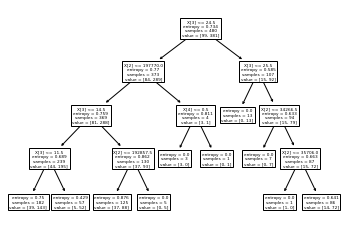

In [45]:
tree.plot_tree(model)

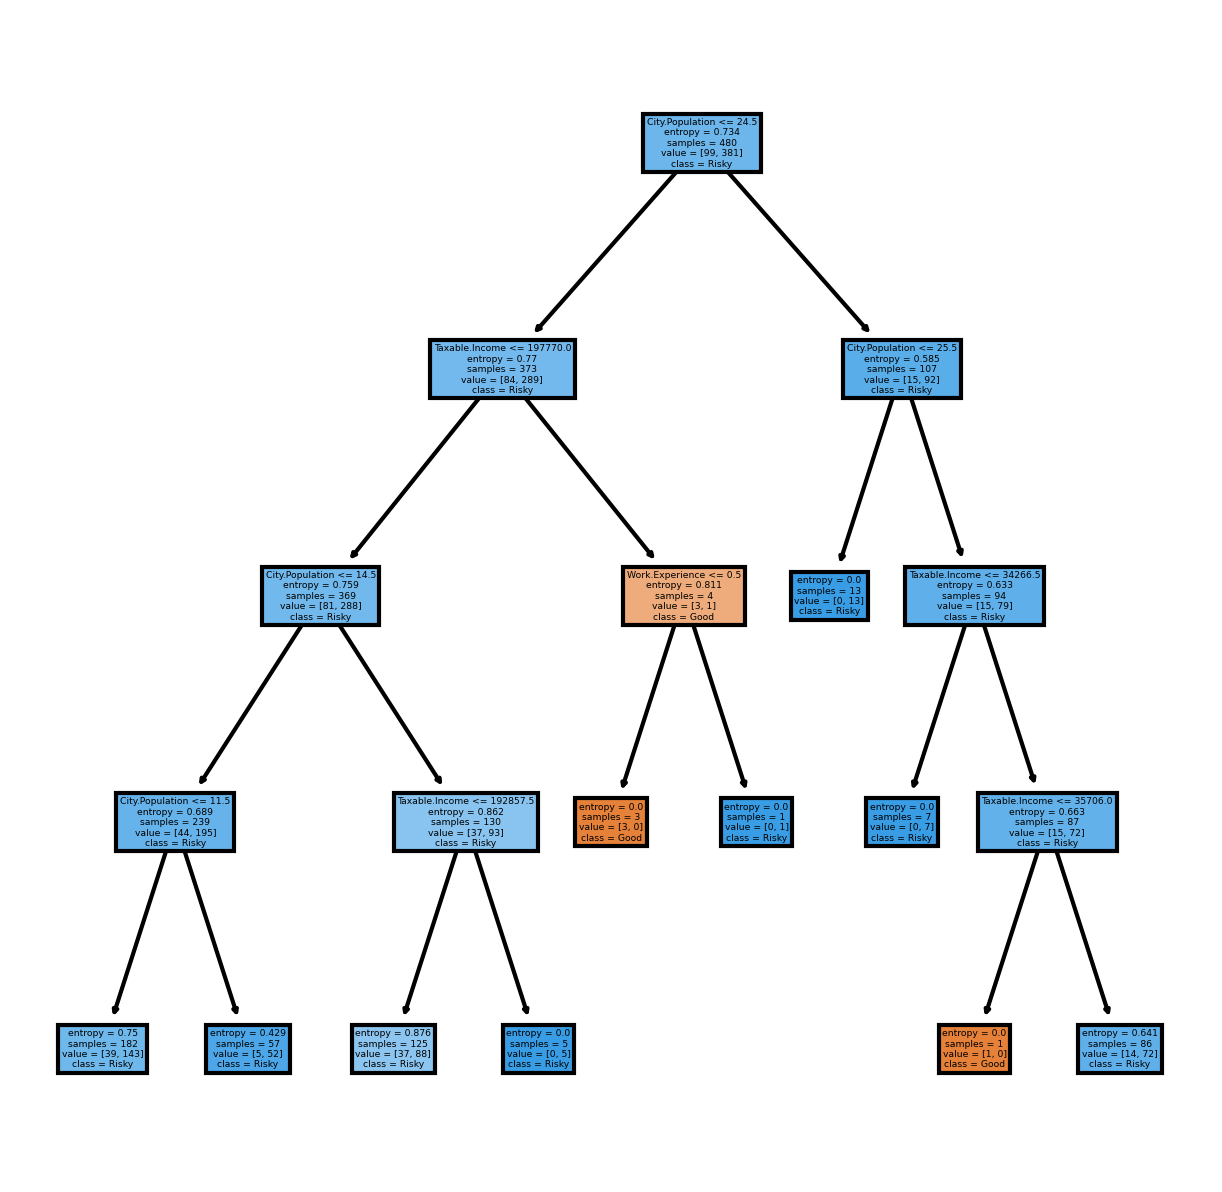

In [46]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience', 'Urban']
cn = ['Good', 'Risky']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [47]:
## Predicting Model

In [48]:
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
pd.Series(prediction).value_counts()

1    119
0      1
dtype: int64

In [50]:
pd.crosstab(y_test,prediction)

col_0,0,1
Taxable.Income1,,
0,0,25
1,1,94


In [51]:
# Accuracy

In [52]:
np.mean(prediction==y_test)

0.7833333333333333